# Exercise 1

# Synthetic data, Random Vectors

## Generation of synthetic data

In [3]:
import numpy as np   
rndn3d = np.random.randn(500,3)

## Visualization

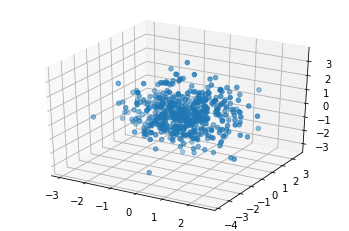

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rndn3d[:,0],rndn3d[:,1],rndn3d[:,2])
plt.show()

## PCA on random vectors

Fit PCA

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
# to apply analysis to your data
pca.fit(rndn3d)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Display characteristics of PCA

In [21]:
pca.explained_variance_ratio_

array([0.39462247, 0.31471345, 0.29066408])

In [22]:
pca.components_

array([[ 0.50151004, -0.19002801,  0.84402431],
       [ 0.38785651, -0.82266525, -0.41567922],
       [ 0.77334016,  0.53582762, -0.33887129]])

# Question 3

## Apply dilation and rotation to the previously generated data

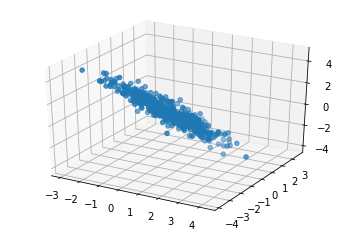

In [26]:
#do a PCA, throw away low dimension components and consider the higher components to be a factor solution
# reduce dimensions

s1 = np.array([[2,0,0],[0,1,0],[0,0,0.3]])  # matrice de déformation
r1 = np.array([[0.36,0.48,-0.8],[-0.8,0.6,0],[0.48,0.64,0.6]])  # matrice de rotation
rndef = rndn3d.dot(s1).dot(r1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rndef[:,0],rndef[:,1],rndef[:,2])

plt.show()

## Apply PCA to the previously processed data

In [28]:
#Fit of the model
pca = PCA(n_components=3)
pca.fit(rndef)
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.78952184 0.19034883 0.02012932]
[[-0.39790121 -0.47025755  0.78773883]
 [-0.78927842  0.6131676  -0.03263536]
 [ 0.46766891  0.6347309   0.61514427]]


# PCA on MAMMALS

We import the data

In [10]:
mammals = np.loadtxt('./mammals.csv', delimiter=',',usecols=[1,2,3,4,5,6,7,8,9,10], skiprows=1)
noms = np.genfromtxt('./mammals.csv', dtype='str', delimiter=';', usecols=[0], skip_header=1)

## Apply PCA, explain eigenvalues

In [27]:
# eigenvector or characteristic vector of a linear transformation is a non-zero vector
#that changes by only a scalar factor when that linear transformation is applied to it
# PCA finds vectors on which the projected data has maximum variance. It helps when you want to find a reduced-rank representation of your data. 
#In layman terms PCA helps to compress data and will create new features that minimizes the information loss.


pca = PCA()
pca.fit(mammals)
pca.explained_variance_ratio_

array([9.61492649e-01, 3.35026815e-02, 4.90760735e-03, 8.11547630e-05,
       1.21589728e-05, 2.12907093e-06, 8.08341160e-07, 4.40101019e-07,
       3.18913491e-07, 5.23943276e-08])

## Normalize the data, apply PCA on the normalized data

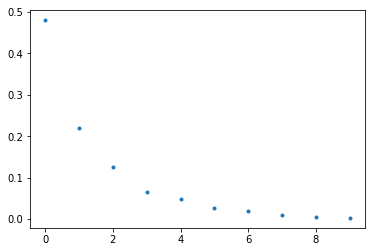

In [30]:
from sklearn import preprocessing
mammalsNorm = preprocessing.scale(mammals)
pcaNorm = PCA()
pcaNorm.fit(mammalsNorm)

pcaNorm.explained_variance_ratio_

plt.plot(pcaNorm.explained_variance_ratio_,'.')
plt.show()

## Display projections on two first axes

We display the data on the two first axes

In [43]:
mNt = pcaNorm.transform(mammalsNorm)
mNt[:2,:] # slice the array - only 2 axes; 

array([[ 6.50530263,  6.7330641 ,  3.43983054, -2.05458566, -1.38117895,
         0.06000125,  0.66178241,  0.31378774, -0.37607103, -0.30709013],
       [-0.42443283, -0.80647942, -0.41704187, -1.29587063,  0.09294702,
         0.39025445, -0.16477426,  0.09485348,  0.31128589, -0.1266842 ]])

### We visualize the result

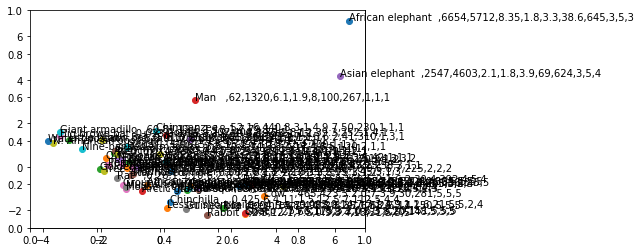

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = fig.add_subplot(111)
for i in range(len(noms)):
    x,y = mNt[i,0],mNt[i,1]
    ax.scatter(x,y)
    ax.text(x,y,noms[i])

plt.show()

### We display the data on the three first axes

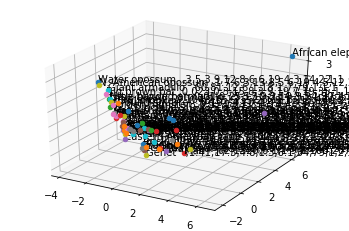

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(noms)):
    x,y,z = mNt[i,0],mNt[i,1],mNt[i,2]
    ax.scatter(x,y,z)
    ax.text(x,y,z,noms[i])

plt.show()


# PCA on LEAF

We import the data 

In [52]:
leaf = np.loadtxt('./leaf.csv', delimiter=',')

## Apply PCA, display eigenvalues

We fit PCA

In [53]:
from sklearn import preprocessing
leafN = preprocessing.scale(leaf[:,2:])
pca = PCA()
pca.fit(leafN)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

We plot explained variance

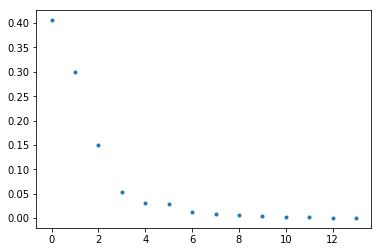

In [54]:
plt.plot(pca.explained_variance_ratio_,'.')
plt.show()

## Project on 3 PC

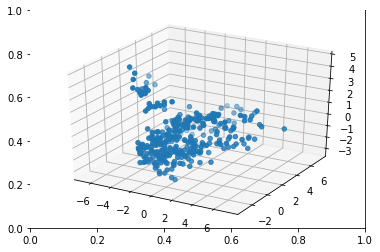

In [55]:
leafNt = pca.transform(leafN)
leafNt[:2,:]

fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(leafNt[:,0],leafNt[:,1],leafNt[:,2])

plt.show()

## Display the projections of the data on the 3 first principal components giving dif-ferent colors to the labels

Same Question as Question 2 but we add labels

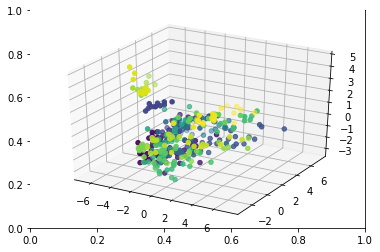

In [56]:
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
# c = color; [values you want, column you want]
ax.scatter(leafNt[:,0],leafNt[:,1],leafNt[:,2],c=leaf[:,0])

plt.show()

# IRIS DATA

Import data

In [39]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]# we only take the first two features.
y = iris.target

## Preprocess

In [20]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# Question 2

In [21]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327]
 [-0.11010327  1.00671141]]


# Question 3

In [22]:
cov_mat = np.cov(X_std.T)#alternative method
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]

Eigenvalues 
[0.89660814 1.11681468]


# Question 4

In [23]:
cor_mat = np.corrcoef(X_std.T)

eig_vals_cor, eig_vecs_cor = np.linalg.eig(cor_mat)

print('Eigenvectors \n%s' %eig_vecs_cor)
print('\nEigenvalues \n%s' %eig_vals_cor)

Eigenvectors 
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Eigenvalues 
[1.10936925 0.89063075]


# Question 5

In [24]:
eig_pairs_cor = [(np.abs(eig_vals_cor[i]), eig_vecs_cor[:,i]) for i in range(len(eig_vals_cor))]

# Question 6

In [25]:
eig_pairs_cor.sort()
eig_pairs_cor.reverse()

We print the result

In [26]:
print('Eigenvalues in descending order:')
for i in eig_pairs_cor:
    print(i[0])

Eigenvalues in descending order:
1.1093692499506493
0.8906307500493506


# Question 7

In [27]:
tot = sum(eig_vals_cor)
var_exp = [(i / tot)*100 for i in sorted(eig_vals_cor, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 55.4684625, 100.       ])